In [1]:
from karabo.simulation.signal.plotting import SignalPlotting, SegmentationPlotting
from karabo.simulation.signal.signal_21_cm import Signal21cm
from karabo.simulation.signal.synchroton_signal import SignalSynchroton
from karabo.simulation.signal.galactic_foreground import SignalGalacticForeground
from karabo.simulation.signal.superimpose import Superimpose
from karabo.simulation.signal.superpixel_segmentation import SuperpixelSegmentation
from karabo.simulation.signal.seg_u_net_segmentation import SegUNetSegmentation
from karabo.simulation.signal.base_signal import BaseSignal
from karabo.simulation.signal.typing import BaseImage
import multiprocessing
import threading
import time
from karabo.simulation.signal.base_signal import BaseSignal
from karabo.simulation.signal.typing import BaseImage


from astropy.coordinates import Angle, SkyCoord
from astropy import units
from karabo.simulation.signal.typing import Image2D, Image3D

2023-05-31 10:33:23.336918: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
print(SignalGalacticForeground.available_redshifts())
print("- " * 3)
print(Signal21cm.available_redshifts())

[7.6, 8.4, 9.2, 9.9, 10.7, 11.5, 12.2, 13.0, 14.3, 15.1, 15.8, 16.6, 17.4, 18.1, 18.9, 19.7, 20.4, 21.2, 22.0, 22.7]
- - - 
[6.0, 6.056, 6.113, 6.172, 6.231, 6.292, 6.354, 6.418, 6.483, 6.549, 6.617, 6.686, 6.757, 6.83, 6.905, 6.981, 7.059, 7.139, 7.221, 7.305, 7.391, 7.48, 7.57, 7.664, 7.76, 7.859, 7.96, 8.064, 8.172, 8.283, 8.397, 8.515, 8.636, 8.762, 8.892, 9.026, 9.164, 9.308, 9.457, 9.611, 9.771, 9.938, 10.11, 10.29, 10.478, 10.673, 10.877, 11.09, 11.313, 11.546, 11.791, 12.048, 12.318, 12.603, 12.903, 13.221, 13.557, 13.914, 14.294, 14.699, 15.132, 15.596, 16.095, 16.633, 17.215, 17.848, 18.54, 19.298, 20.134]


**7.6** lower:7.57 (0.03) higher:7.664 (0.064)  
**8.4** lower:8.397 (0.003) higher:8.515 (0.115)  
**9.2** lower:9.164 (0.036) higher:9.308 (0.108)  
**9.9** lower:9.771 (0.129) higher:9.938 (0.038)

**10.7** lower:10.673 (0.027) higher:10.877 (0.177)  
**11.5** lower:11.313 (0.187) higher:11.546 (0.046)  
**12.2** lower:12.048 (0.152) higher:12.318 (0.118)  
**13.0** lower:12.903 (0.097) higher:13.221 (0.221)

**14.3** lower:14.294 (0.006) higher:14.699 (0.399)  
**15.1** lower:14.699 (0.401) higher:15.132 (0.032)  
**15.8** lower:15.596 (0.204) higher:16.095 (0.295)  
**16.6** lower:16.095 (0.505) higher:16.633 (0.033)

**17.4** lower:17.215 (0.185) higher:17.848 (0.448)  
**18.1** lower:17.848 (0.252) higher:18.54 (0.44)  
**18.9** lower:18.54 (0.36) higher:19.298 (0.398)  
**19.7** lower:19.298 (0.402) higher:20.134 (0.434)

**20.4** lower:20.134 (0.266) higher: -  
**21.2** lower: - higher: -  
**22.0** lower: - higher: -  
**22** lower: - higher: -


**7.6** lower:7.57 (0.03)  
**8.4 lower:8.397 (0.003)**  
**9.2** lower:9.164 (0.036)  
**9.9** higher:9.938 (0.038)

**10.7 lower:10.673 (0.027)**  
**11.5** higher:11.546 (0.046)  
**13.0** lower:12.903 (0.097)

**14.3 lower:14.294 (0.006)**  
**15.1** higher:15.132 (0.032)  
**16.6** higher:16.633 (0.033)

**17.4 lower:17.215 (0.185)**  
**18.1** lower:17.848 (0.252)  
**18.9** lower:18.54 (0.36)

**20.4 lower:20.134 (0.266)**


In [3]:
# (Galactic, Signal21)
redshift_sig21 = [
    8.397,
    10.673,
    14.294,
    17.215,
    20.134,
]
redshift_gf = [
    8.4,
    10.7,
    14.3,
    17.4,
    20.4,
]

100%|██████████| 250/250 [00:00<00:00, 411.30it/s]


Estimating superpixel labels using SLIC...
The output contains the labels with 1000 segments
Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 23420.35it/s]


...done
Constructing the superpixel map...


100%|██████████| 1000/1000 [00:14<00:00, 69.44it/s]


Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 31873.31it/s]


...done
Constructing the superpixel map...


100%|██████████| 250/250 [00:00<00:00, 439.78it/s]
2023-05-16 15:26:09.756144: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 250/250 [00:00<00:00, 421.74it/s]


Estimating superpixel labels using SLIC...
The output contains the labels with 1000 segments
Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 31539.20it/s]


...done
Constructing the superpixel map...


100%|██████████| 1000/1000 [00:16<00:00, 59.08it/s]


Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 33489.33it/s]


...done
Constructing the superpixel map...


100%|██████████| 250/250 [00:00<00:00, 419.14it/s]


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 250/250 [00:00<00:00, 420.13it/s]


Estimating superpixel labels using SLIC...
The output contains the labels with 1000 segments
Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 32212.34it/s]


...done
Constructing the superpixel map...


100%|██████████| 1000/1000 [00:17<00:00, 57.85it/s]


Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 31795.26it/s]


...done
Constructing the superpixel map...


100%|██████████| 250/250 [00:00<00:00, 427.51it/s]


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 250/250 [00:00<00:00, 400.67it/s]


Estimating superpixel labels using SLIC...
The output contains the labels with 1000 segments
Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 32292.94it/s]


...done
Constructing the superpixel map...


100%|██████████| 1000/1000 [00:19<00:00, 52.54it/s]


Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 30758.37it/s]


...done
Constructing the superpixel map...


100%|██████████| 250/250 [00:00<00:00, 435.88it/s]


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 250/250 [00:00<00:00, 421.72it/s]


Estimating superpixel labels using SLIC...
The output contains the labels with 1000 segments
Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 32477.98it/s]


...done
Constructing the superpixel map...


100%|██████████| 1000/1000 [00:17<00:00, 56.25it/s]


Estimating the superpixel mean map...


100%|██████████| 1000/1000 [00:00<00:00, 30809.43it/s]


...done
Constructing the superpixel map...


100%|██████████| 250/250 [00:00<00:00, 431.81it/s]


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 1/1 [00:10<00:00, 10.56s/it]


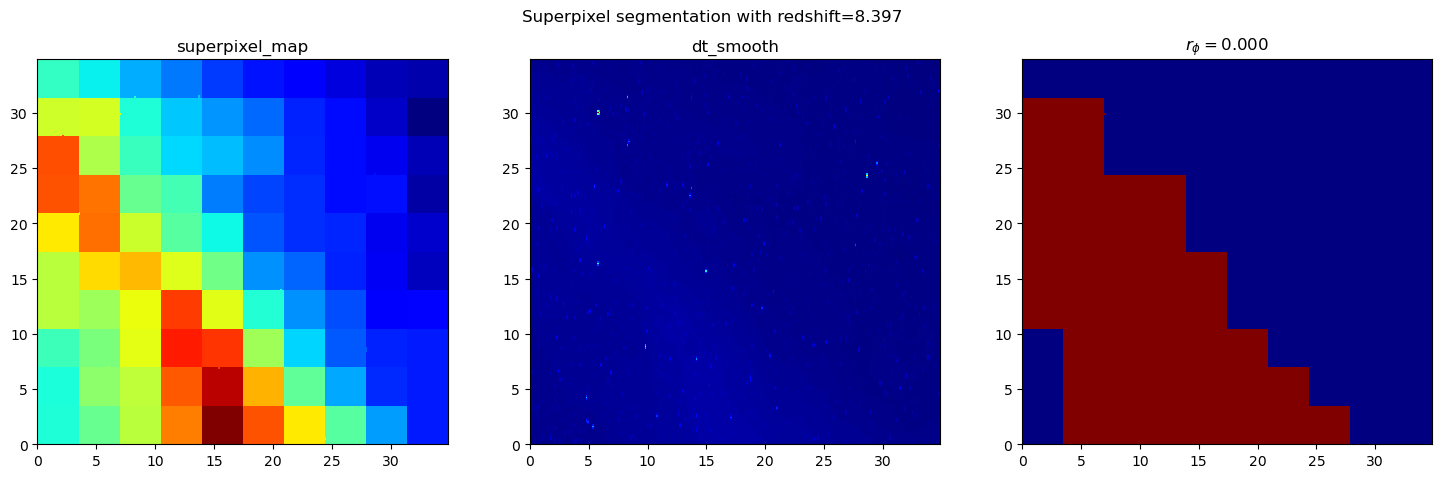

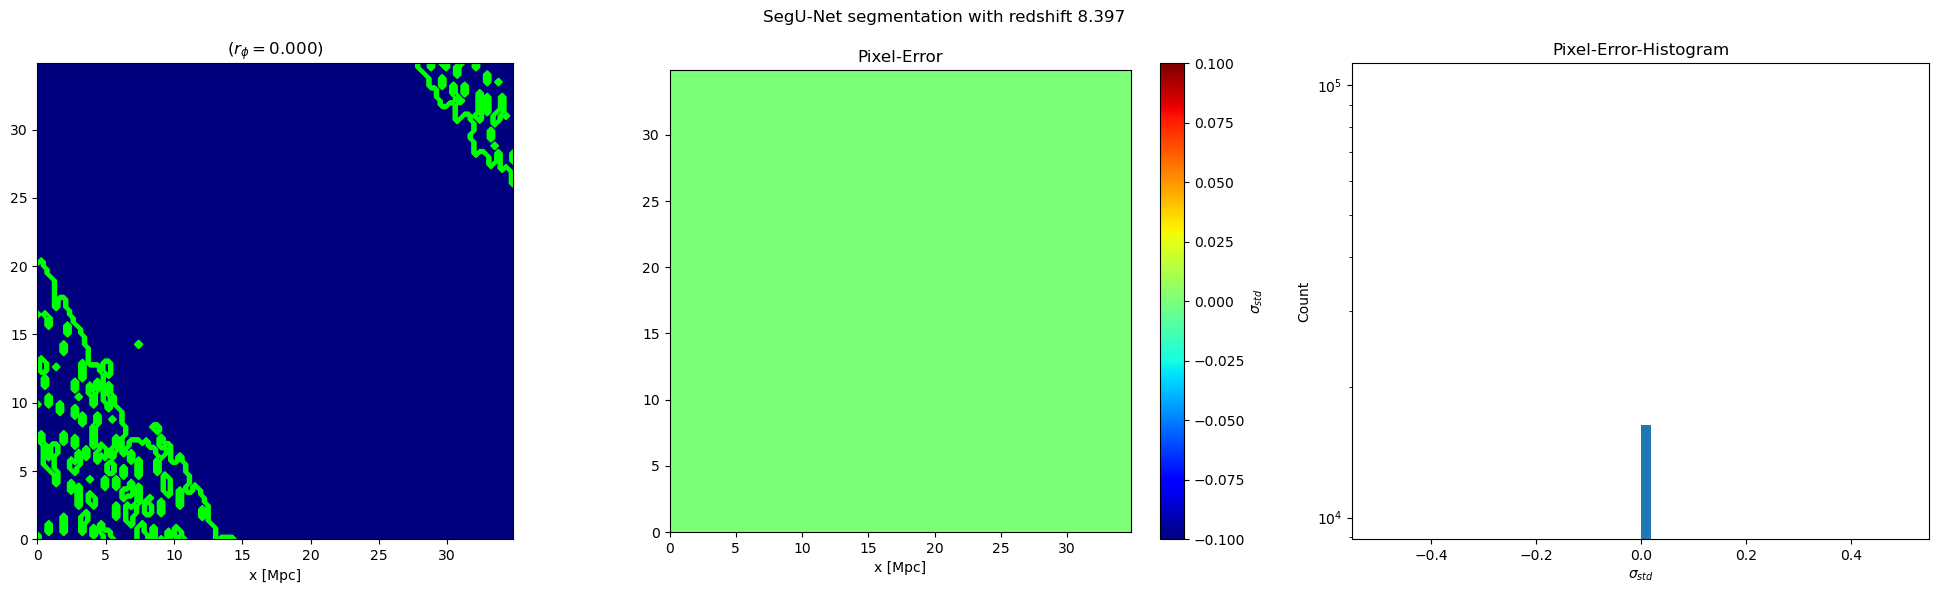

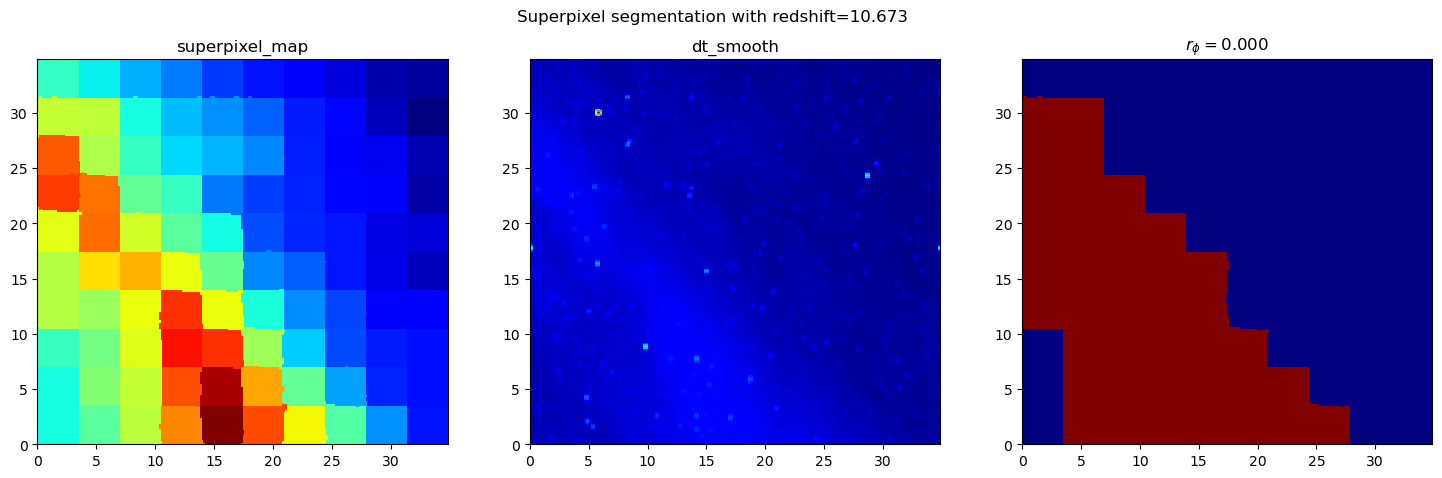

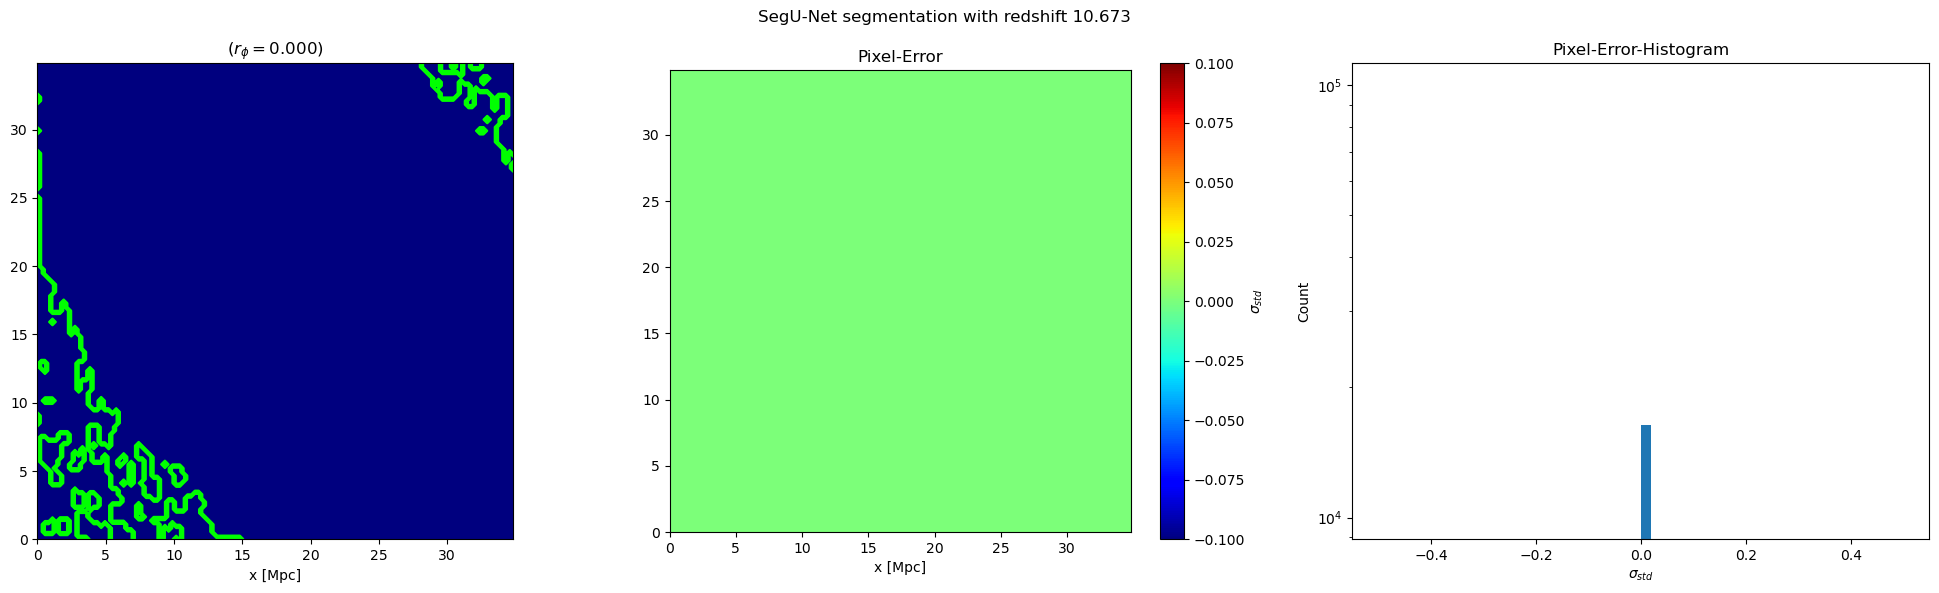

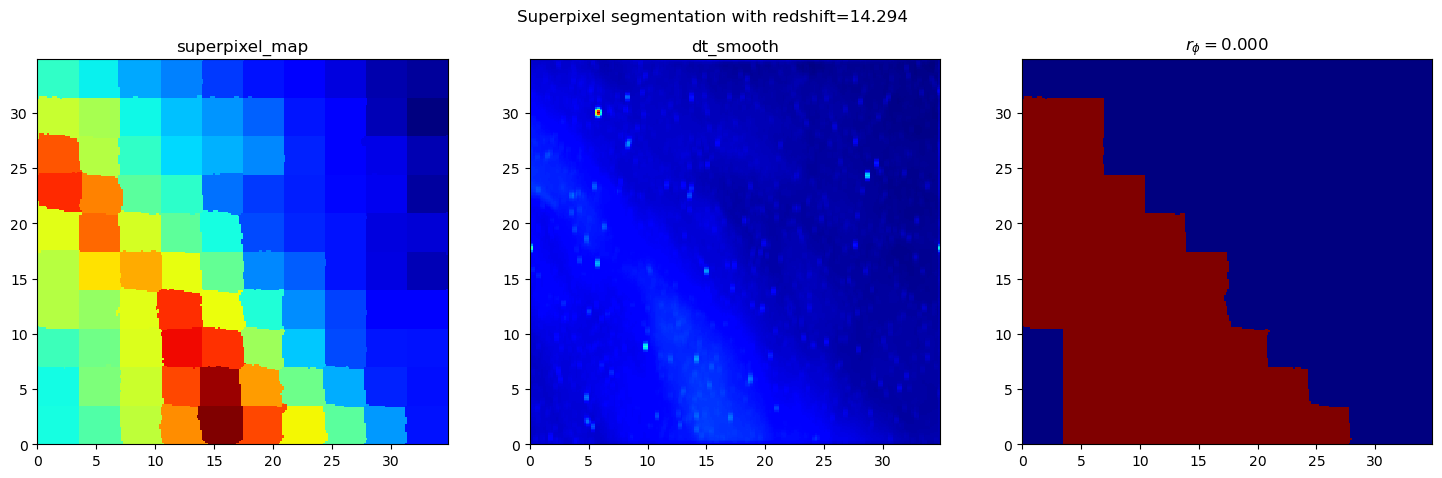

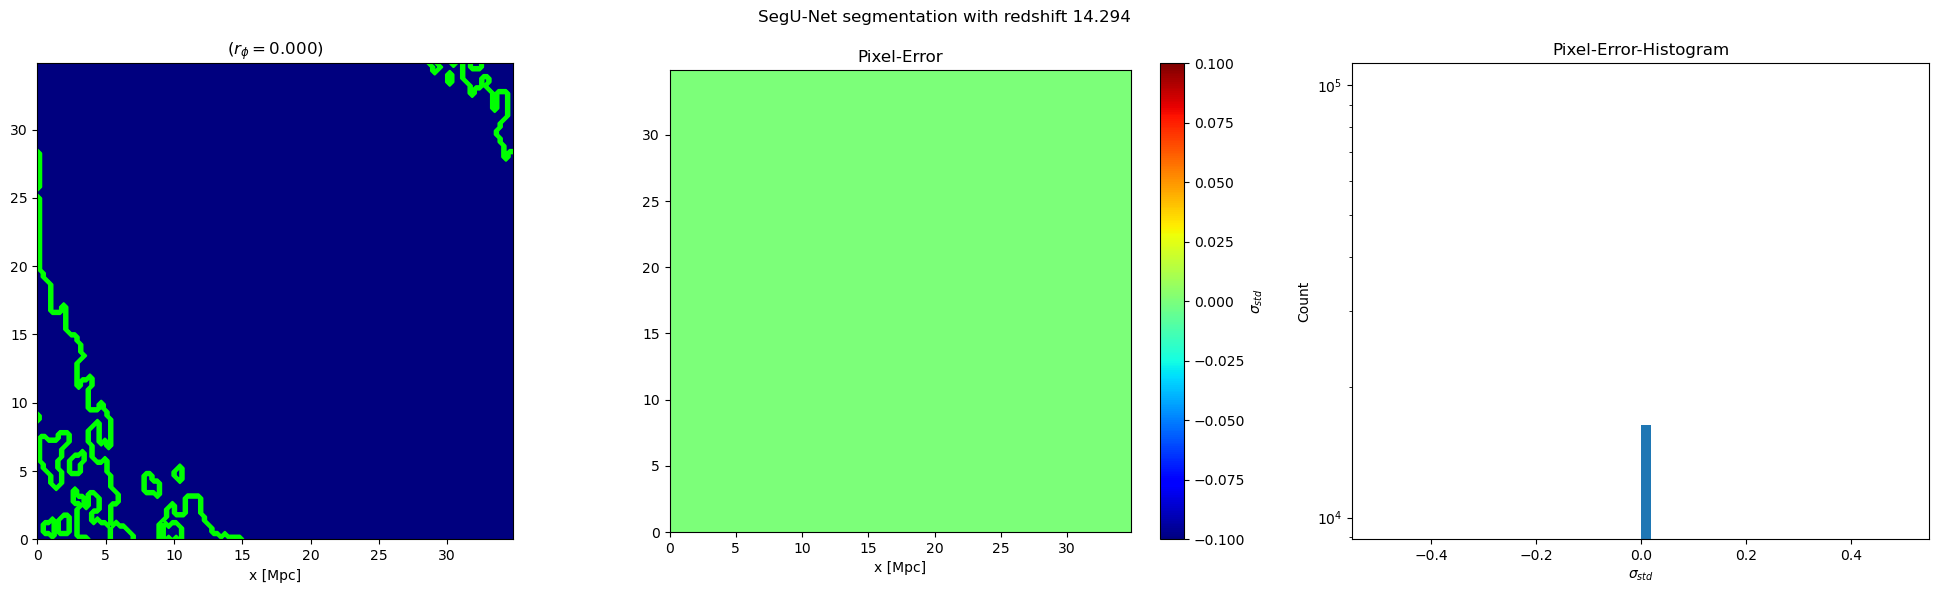

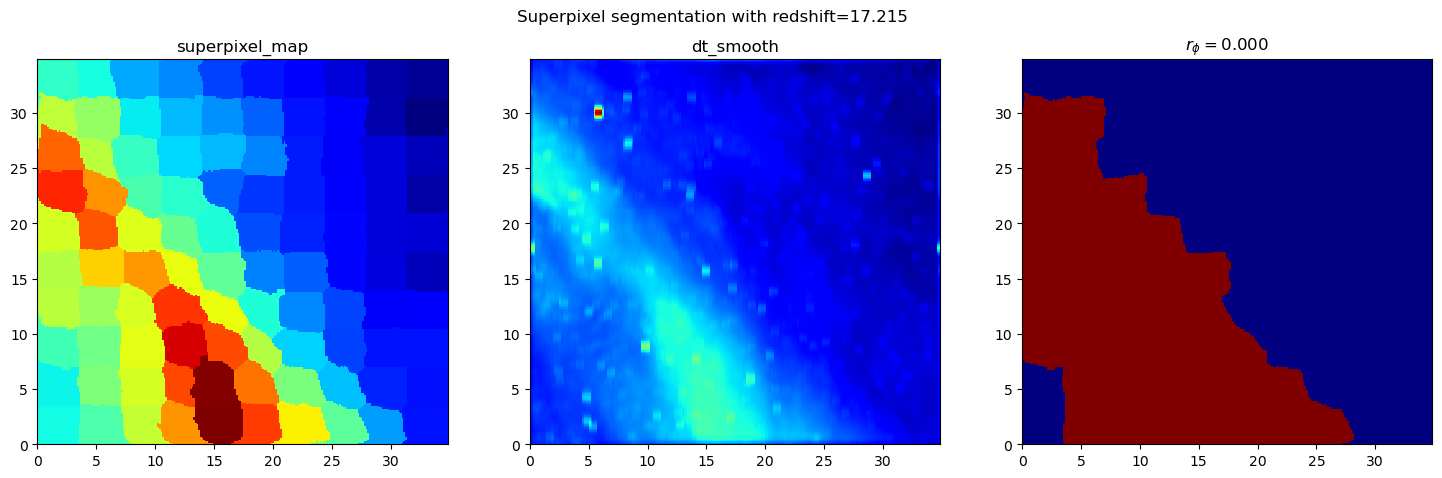

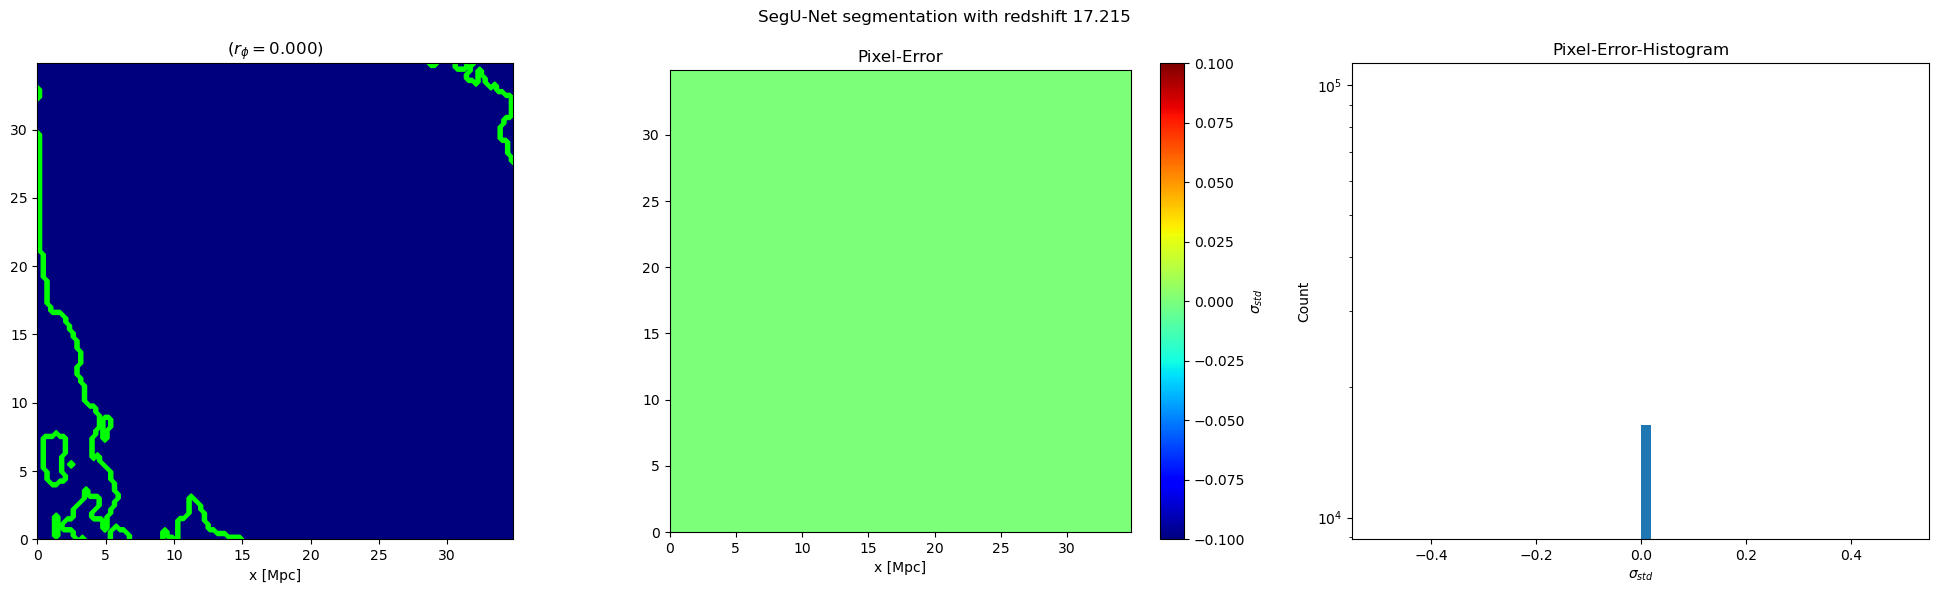

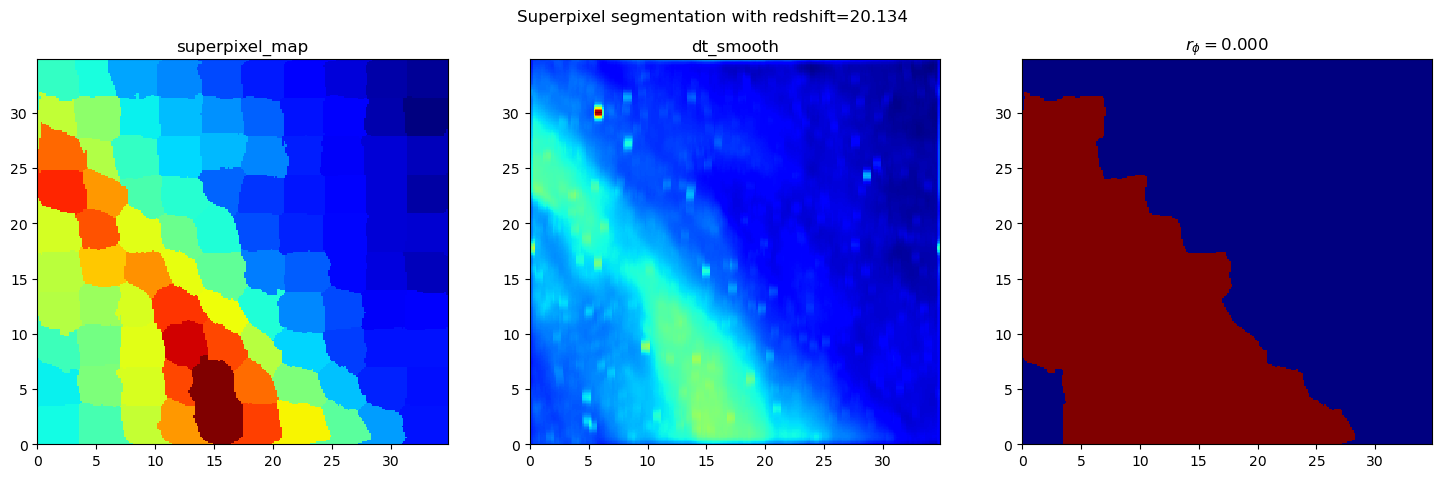

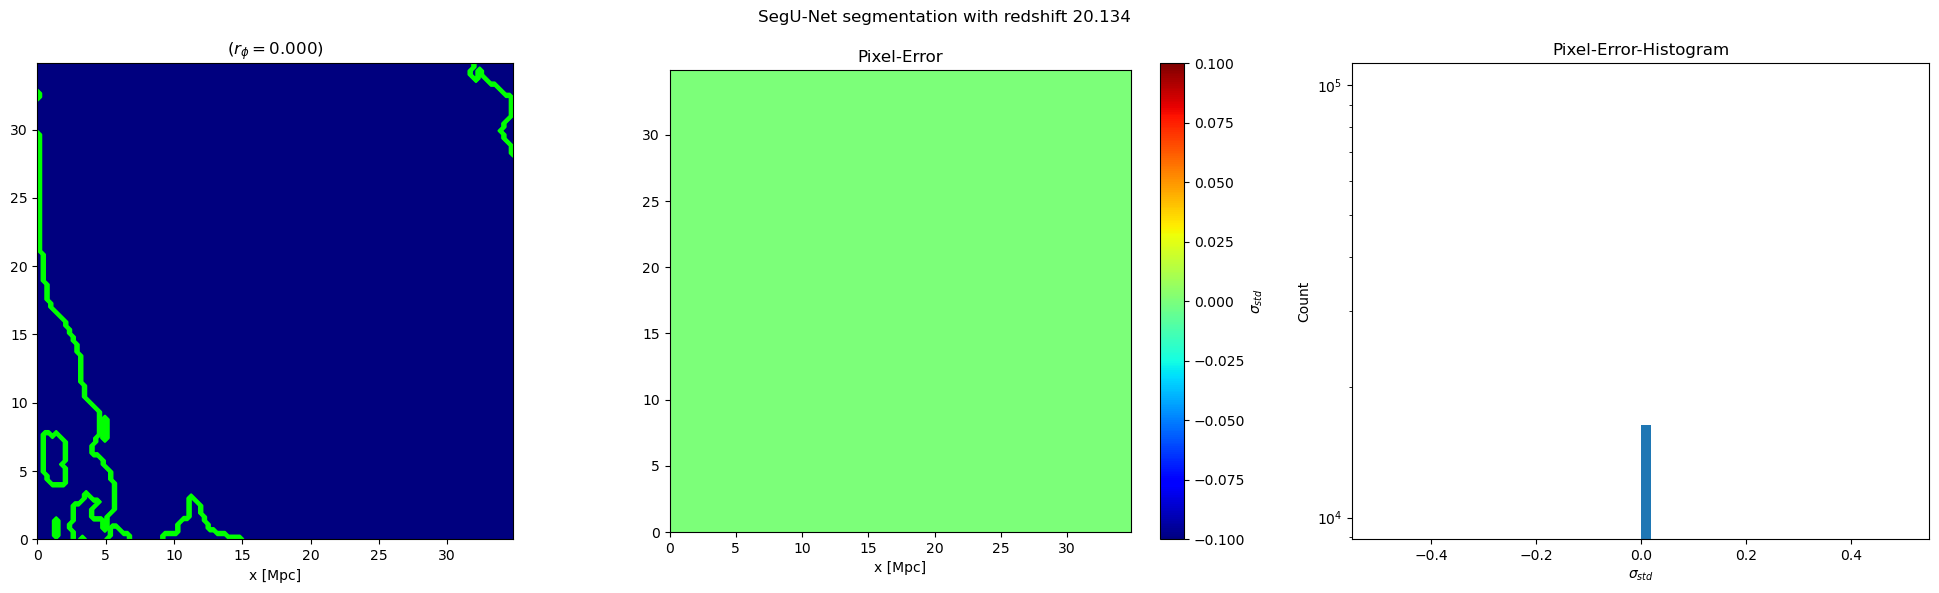

In [4]:
class ZPipeline:
    def __init__(
        self, redshifts_sig21: list[float], redshifts_galactic: list[float]
    ) -> None:
        self.redshifts_sig21 = redshifts_sig21
        self.redshifts_galactic = redshifts_galactic

        # prepare signal21cm
        files_sig21 = [
            Signal21cm.get_xfrac_dens_file(z=z, box_dims=244 / 0.7)
            for z in redshifts_sig21
        ]
        self.signal_21 = Signal21cm(files_sig21)
        grid_size = (250, 250)

        # prepare galactic foreground
        cent = SkyCoord(ra=10 * units.degree, dec=20 * units.degree, frame="icrs")
        fov = Angle([20, 20], unit=units.degree)
        self.gf = SignalGalacticForeground(
            cent,
            redshifts=redshifts_galactic,
            fov=fov,
            grid_size=grid_size,
        )

        # prepare synchroton
        self.sync = SignalSynchroton(
            centre=cent,
            fov=fov,
            grid_size=grid_size,
        )

    def run(self) -> list[BaseImage]:
        image_sync = self.sync.simulate()[0]
        images_sig21 = self.signal_21.simulate()
        images_galactic = self.gf.simulate()

        images = []
        for im_21, im_gal in zip(images_sig21, images_galactic):
            image = Superimpose.combine(im_21, im_gal, image_sync)
            images.append(image)

        res = []
        for image, sig_21 in zip(images, images_sig21):
            superpixel_image = SuperpixelSegmentation().segment(image)
            _ = SegmentationPlotting.superpixel_plotting(superpixel_image, sig_21)

            seg_u_net_image = SegUNetSegmentation(tta=0).segment(image)
            _ = SegmentationPlotting.seg_u_net_plotting(seg_u_net_image)

            res.append((superpixel_image, seg_u_net_image))

        return res


# images = ZPipeline(redshifts_sig21=redshift_sig21, redshifts_galactic=redshift_gf).run()

In [2]:
import multiprocessing
import threading
import time
from karabo.simulation.signal.base_signal import BaseSignal
from karabo.simulation.signal.typing import BaseImage


class ThreadWithReturnValue(threading.Thread):
    def __init__(
        self, group=None, target=None, name=None, args=(), kwargs={}, Verbose=None
    ):
        threading.Thread.__init__(self, group, target, name, args, kwargs)
        self._return = None

    def run(self):
        if self._target is not None:
            self._return = self._target(*self._args, **self._kwargs)

    def join(self, *args):
        threading.Thread.join(self, *args)
        return self._return


class ParallelZPipeline:
    def __init__(
        self,
        redshifts_sig21: list[float],
        redshifts_galactic: list[float],
        max_baseline: float = 70.0,
        n_segments: int = 1000,
        max_iter: int = 10,
        tta: int = 1,  # TODO set to 2 (and other good values)
    ) -> None:
        self.redshifts_sig21 = redshifts_sig21
        self.redshifts_galactic = redshifts_galactic

        # prepare signal21cm
        files_sig21 = [
            Signal21cm.get_xfrac_dens_file(z=z, box_dims=244 / 0.7)
            for z in redshifts_sig21
        ]
        self.signal_21 = Signal21cm(files_sig21)
        grid_size = (250, 250)

        # prepare galactic foreground
        cent = SkyCoord(ra=10 * units.degree, dec=20 * units.degree, frame="icrs")
        fov = Angle([20, 20], unit=units.degree)
        self.gf = SignalGalacticForeground(
            cent,
            redshifts=redshifts_galactic,
            fov=fov,
            grid_size=grid_size,
        )

        # prepare synchroton
        self.sync = SignalSynchroton(
            centre=cent,
            fov=fov,
            grid_size=grid_size,
        )

        self.max_baseline = max_baseline
        self.n_segments = n_segments
        self.max_iter = max_iter
        self.tta = tta

        self._results = multiprocessing.Queue()

    def run(self) -> list[BaseImage]:
        sig_sync_thread = ThreadWithReturnValue(target=self._simulate_syncroton)
        sig_21cm_thread = ThreadWithReturnValue(target=self._simulate_signal_21cm)
        sig_gf_thread = ThreadWithReturnValue(target=self._simulate_galactic_foreground)

        sig_sync_thread.start()
        sig_21cm_thread.start()
        sig_gf_thread.start()

        image_sync = sig_sync_thread.join()[0]
        images_sig21 = sig_21cm_thread.join()
        images_galactic = sig_gf_thread.join()

        print("Done simulating")

        images: list[BaseImage] = []
        for im_21, im_gal in zip(images_sig21, images_galactic):
            image = Superimpose.combine(im_21, im_gal, image_sync)
            images.append(image)

        print("Done combining, on to the Segmentation")

        # procs: list[multiprocessing.Process] = []
        # for idx, (image, sig_21) in enumerate(zip(images, images_sig21)):
        #     print(f"Segmenting {idx}")

        #     su_proc = multiprocessing.Process(
        #         target=self._run_superpixel,
        #         args=(image, idx),
        #     )
        #     procs.append(su_proc)
        #     su_proc.start()

        #     segu_proc = multiprocessing.Process(
        #         target=self._run_segunet,
        #         args=(image, idx),
        #     )
        #     procs.append(segu_proc)
        #     segu_proc.start()

        # for proc in procs:
        #     idx = 0
        #     while proc.is_alive():
        #         print(f"waiting on segmentation (for {idx*20} seconds)")
        #         idx += 1
        #         time.sleep(20)
        #     proc.join()

        # print("All segmentation done")

        # return [x[1] for x in sorted(list(self._results), key=lambda x: x[0])]

        res = []
        idx = 0
        for image, sig_21 in zip(images, images_sig21):
            superpixel_image = SuperpixelSegmentation(
                # max_baseline=self.max_baseline,
                max_iter=self.max_iter,
                n_segments=self.n_segments,
            ).segment(image)
            superpixel_plot = SegmentationPlotting.superpixel_plotting(
                superpixel_image, sig_21
            )
            superpixel_plot.savefig(
                f"./karabo/simulation/signal/plots/superpixel_plot_z{image.redshift}_baseline_{self.max_baseline}.png"
            )

            seg_u_net_image = SegUNetSegmentation(
                # max_baseline=self.max_baseline, tta=self.tta
                max_baseline=70,
                tta=1,
            ).segment(sig_21)
            seg_u_net_plot = SegmentationPlotting.seg_u_net_plotting(seg_u_net_image)
            seg_u_net_plot.savefig(
                f"./karabo/simulation/signal/plots/seg_u_net_plot_z{image.redshift}_baseline_{self.max_baseline}.png"
            )

            res.append((superpixel_image, seg_u_net_image))
            idx += 1
            print(f"Segmentation {idx}/{len(images)} done")

    def _simulate_syncroton(self) -> Image2D:
        print("Running synchroton")
        return self.sync.simulate()

    def _simulate_signal_21cm(self) -> Image2D:
        print("Running 21cm")
        return self.signal_21.simulate()

    def _simulate_galactic_foreground(self) -> Image2D:
        print("Running Galactic foreground")
        return self.gf.simulate()

    # def _run_superpixel(self, image: Image3D, idx: int) -> None:
    #     print("Running Superpixel")
    #     segmented = SuperpixelSegmentation(max_iter=100).segment(image)  # TODO
    #     self._results.put((idx, segmented.image))

    # def _run_segunet(self, image: Image3D, idx: int) -> None:
    #     print("Running  SegU-net")
    #     segmented = SegUNetSegmentation(tta=0).segment(image)
    #     self._results.put((idx, segmented))  # TODO

        return res


images = ParallelZPipeline(
    redshifts_sig21=redshift_sig21,
    redshifts_galactic=redshift_gf,
    max_baseline=70.0,
    n_segments=5000,
    max_iter=10,
    tta=1,
).run()

Running synchroton
Running 21cm
Running Galactic foreground
Done simulating
Done combining
Segmenting 0
Running  SegU-net
 SegU-net initialized 🩵


  0%|          | 0/250 [00:00<?, ?it/s]

still running 🧡 for the 0st


100%|██████████| 250/250 [00:00<00:00, 409.49it/s]
2023-05-17 14:42:08.966676: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 Loaded model: /home/claire/miniconda3/envs/karabo-env/lib/python3.9/site-packages/tools21cm/input_data/segunet_02-10T23-52-36_128slice_ep56.h5


100%|██████████| 1/1 [00:09<00:00,  9.73s/it]


 SegU-net segmentet 💚
Ready to return the SegU-net 💛
still running 🧡 for the 1st
still running 🧡 for the 2st
still running 🧡 for the 3st
still running 🧡 for the 4st
still running 🧡 for the 5st
still running 🧡 for the 6st


KeyboardInterrupt: 

In [ ]:
async def factorial(name, number):
    f = 1
    for i in range(2, number + 1):
        print(f"Task {name}: Compute factorial({number}), currently i={i}...")
        await asyncio.sleep(1)
        f *= i
    print(f"Task {name}: factorial({number}) = {f}")
    return f


async def main():
    # Schedule three calls *concurrently*:
    L = await asyncio.gather(
        factorial("A", 2),
        factorial("B", 3),
        factorial("C", 4),
    )
    print(L)


asyncio.run(main())

In [ ]:
_ = SignalPlotting.brightness_temperature(sig_21)
_ = SignalPlotting.general_img(gf_sim, "Galactic foreground")  # TODO
_ = SignalPlotting.general_img(sync_sim, "Synchroton")

out_img = Image2D(
    data=out.data[0, :, :],
    x_label=out.x_label[0, 0, :],
    y_label=out.y_label[0, 0, :],
    redshift=out.redshift,
    box_dims=out.box_dims,
)
_ = SignalPlotting.general_img(
    out_img, "Combined signals", x_label="...", y_label="..."
)